<a href="https://colab.research.google.com/github/abdumalikh44/Sentiment-Analysis/blob/main/Sentiment_Analysis_Trailer_Santri_Pilihan_Bunda_(Vidio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Analyze comments on the Santri Pilihan Bunda trailer from YouTube using an API for sentiment analysis
-> [Trailer Video](https://www.youtube.com/watch?v=mJ5qRpxgmuc)

In [ ]:
import googleapiclient.discovery
import pandas as pd

In [ ]:
api_service_name = "youtube"
api_version = "v3"
api_key = "xxxxxxxxxxxxxxxxx"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=api_key)

In [ ]:
video_id = "mJ5qRpxgmuc"
request = youtube.commentThreads().list(
    part="snippet",
    videoId= video_id,
    maxResults=200
)

response = request.execute()

In [ ]:
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'H-xf6_LpR54p5Q3BsLghngdy86o',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpSUlCZ0FFZ1VJaHlBWUFCSUZDS2dnR0FBU0JRaWRJQmdCR0FBaURnb01DTWpvbks4R0VJRFF3N3dD',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': '94LAbBUAuhb5RRgCQ4mxe4pqlww',
   'id': 'UgzSr0J1y9Iuuyfagg94AaABAg',
   'snippet': {'channelId': 'UCdmIbbRekb8q05LV9ZejzsA',
    'videoId': 'mJ5qRpxgmuc',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'hvHkJbsZvVeMTJtSPZf1RAKrRjo',
     'id': 'UgzSr0J1y9Iuuyfagg94AaABAg',
     'snippet': {'channelId': 'UCdmIbbRekb8q05LV9ZejzsA',
      'videoId': 'mJ5qRpxgmuc',
      'textDisplay': 'Bnyk yang nge rekomendasi in cerita wattpad ny cma byk yg bilang ktany sad ending kn jdi ny hati ini resah mau baca tpi ngk kuat sama yg nma ny sad ending ngk di baca bikin penasaran tpi eh mlh muncul film ny kn yg tdi ny ngk mau baca ja

In [ ]:
comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
    ])

In [ ]:
while (1 == 1):
  try:
   nextrun = response['nextPageToken']
  except KeyError:
   break
  nextrun = response['nextPageToken']
  nextRequest = youtube.commentThreads().list(part="snippet", videoId=video_id, maxResults=100, pageToken=nextrun)
  response = nextRequest.execute()
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
    ])

In [ ]:
comments

[['@user-lu6ts9jl7u',
  '2024-04-15T15:08:23Z',
  0,
  'Bnyk yang nge rekomendasi in cerita wattpad ny cma byk yg bilang ktany sad ending kn jdi ny hati ini resah mau baca tpi ngk kuat sama yg nma ny sad ending ngk di baca bikin penasaran tpi eh mlh muncul film ny kn yg tdi ny ngk mau baca jadi penasaran makasih lo kak udh di jadiin film gk penasaran lgi jdiny😂'],
 ['@cokatmillk6874',
  '2024-04-02T05:13:15Z',
  1,
  'Ya Kinan lah masa zero sih 😢'],
 ['@user-cc2se2bg8j', '2024-04-01T23:13:41Z', 0, 'Kinan nya buat aku aja ya'],
 ['@Khoirunnisa-pz5ek', '2024-03-31T18:49:27Z', 0, 'Ichaaaa😩🤒🤕😍'],
 ['@raka_fiyadin',
  '2024-03-31T18:13:17Z',
  0,
  'Yang pertama judul lagu nya apa?'],
 ['@biancaeputri7360', '2024-03-31T01:29:17Z', 0, 'p'],
 ['@nuranisa9427',
  '2024-03-31T00:42:59Z',
  0,
  'Aku dah baca novel nya, jdi kpn ni film nya kk'],
 ['@rahendawibowo9903', '2024-03-29T12:13:24Z', 0, 'zina'],
 ['@healingtv24',
  '2024-03-29T09:56:20Z',
  1,
  'https://youtube.com/shorts/bTocYyIhSH8?s

In [ ]:
df = pd.DataFrame(comments, columns=['user_name', 'comment_at', 'total_like', 'comment_text'])
df['id'] = df.index

In [ ]:
df.head(5)

,user_name,comment_at,total_like,comment_text,id
0,@user-lu6ts9jl7u,2024-04-15T15:08:23Z,0,Bnyk yang nge rekomendasi in cerita wattpad ny...,0
1,@cokatmillk6874,2024-04-02T05:13:15Z,1,Ya Kinan lah masa zero sih 😢,1
2,@user-cc2se2bg8j,2024-04-01T23:13:41Z,0,Kinan nya buat aku aja ya,2
3,@Khoirunnisa-pz5ek,2024-03-31T18:49:27Z,0,Ichaaaa😩🤒🤕😍,3
4,@raka_fiyadin,2024-03-31T18:13:17Z,0,Yang pertama judul lagu nya apa?,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     110 non-null    object
 1   comment_at    110 non-null    object
 2   total_like    110 non-null    int64 
 3   comment_text  110 non-null    object
 4   id            110 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.4+ KB


In [ ]:
import re

def clean_text(text):
    # Mengonversi teks menjadi huruf kecil
    text = text.lower()
    # Menghapus karakter non-alfanumerik
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus emotikon
    text = remove_emoticons(text)
    return text

# Fungsi untuk menghapus emotikon
def remove_emoticons(text):
    # Pola regex untuk emotikon
    emoticon_pattern = re.compile(u'['
        u'\U0001F300-\U0001F5FF'
        u'\U0001F600-\U0001F64F'
        u'\U0001F680-\U0001F6FF'
        u'\U0001F700-\U0001F77F'
        u'\U0001F780-\U0001F7FF'
        u'\U0001F800-\U0001F8FF'
        u'\U0001F900-\U0001F9FF'
        u'\U0001FA00-\U0001FA6F'
        u'\U0001FA70-\U0001FAFF'
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        u'\U0001f926-\U0001f937'
        u'\U00010000-\U0010ffff'
        u'\u200d'
        u'\u2640-\u2642'
        u'\u2600-\u2B55'
        u'\u23cf'
        u'\u23e9'
        u'\u231a'
        u'\u3030'
        u'\ufe0f'
        u'\u2069'
        u'\u2066'
        u'\u200c'
        u'\u2068'
        u'\u2067'
        ']+', re.UNICODE)
    return emoticon_pattern.sub(r'', text)

# Menggunakan clean_text untuk membersihkan teks d


In [ ]:
import re
df['comment_text'] = df['comment_text'].str.lower()
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df.head(5)

,user_name,comment_at,total_like,comment_text,id
0,@user-lu6ts9jl7u,2024-04-15T15:08:23Z,0,bnyk yang nge rekomendasi in cerita wattpad ny...,0
1,@cokatmillk6874,2024-04-02T05:13:15Z,1,ya kinan lah masa zero sih,1
2,@user-cc2se2bg8j,2024-04-01T23:13:41Z,0,kinan nya buat aku aja ya,2
3,@Khoirunnisa-pz5ek,2024-03-31T18:49:27Z,0,ichaaaa,3
4,@raka_fiyadin,2024-03-31T18:13:17Z,0,yang pertama judul lagu nya apa,4


In [ ]:
!pip install transformers

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("w11wo/indonesian-roberta-base-sentiment-classifier")

In [ ]:
from transformers import pipeline

pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=tokenizer
)

In [ ]:
example = df["comment_text"][10]
scores = nlp(example)
print(scores)
print(example)

[{'label': 'negative', 'score': 0.9994291663169861}]
sumpah kayak ga pas pemain nya padahal waktu baca ekspektasi gue wah gituloh 


In [ ]:
example = df["comment_text"][11]
scores = nlp(example)
print(scores)
print(example)

[{'label': 'positive', 'score': 0.9713095426559448}]
kalo ada mbak sarah sechan dah pasti kocak ini sih 


In [ ]:
def sentiment_prediction(data):
  for i in range(df.shape[0]):
    hasil = nlp(df.loc[i,'comment_text'])[0]
    df.loc[i,'sentiment'] = hasil['label']
    df.loc[i,'akurasi'] = hasil['score']

In [ ]:
df['comment_text'] = df['comment_text'].astype(str)

In [ ]:
# Mengatur ulang indeks DataFrame
df = df.reset_index(drop=True)

In [ ]:
#Harus menghapus spesifik index yang comment_text tidak terdeksi sebagai NULL. Why is this happening?
df = df.drop(96)

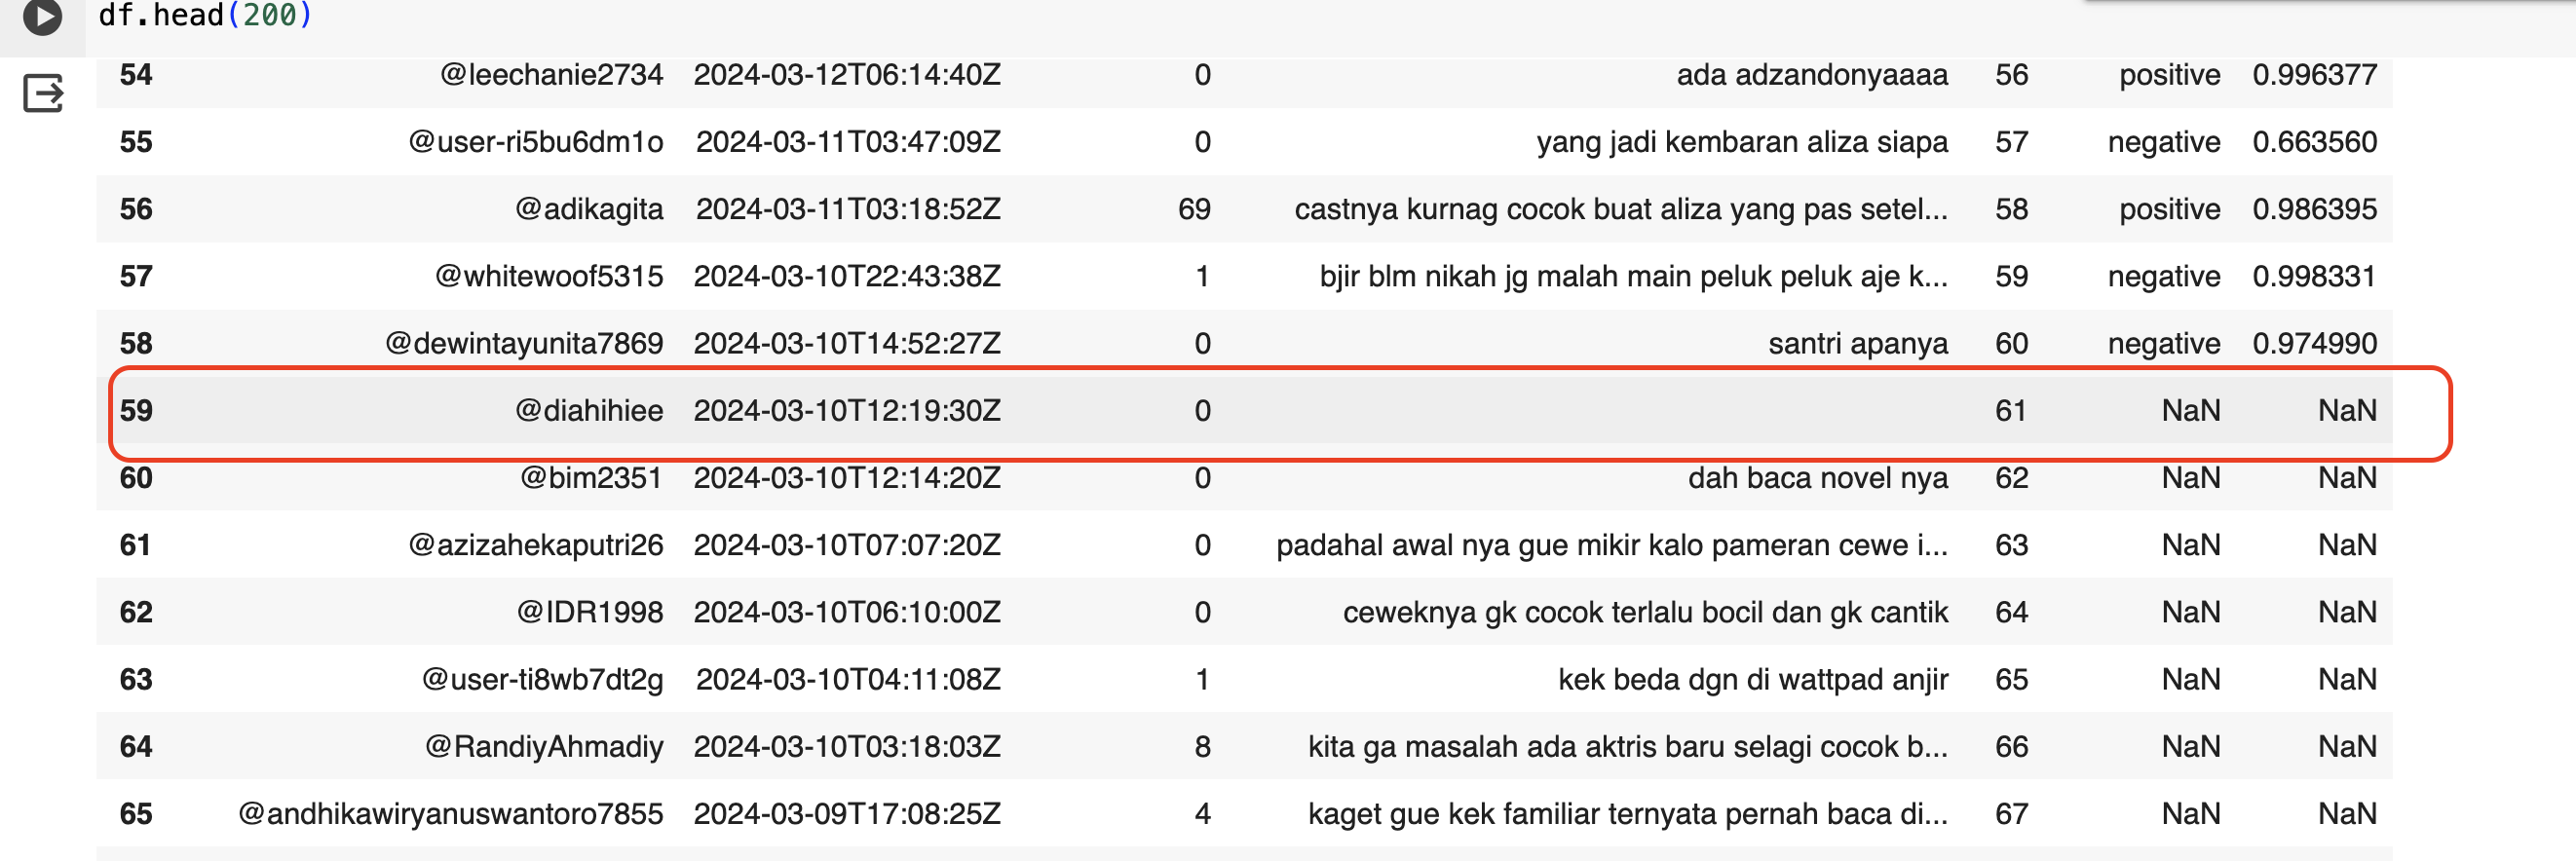

In [ ]:
from IPython.display import Image
Image("/content/Screenshot 2024-05-04 at 16.34.59.png")

In [ ]:
sentiment_prediction(df)

In [ ]:
df.head(10)

,user_name,comment_at,total_like,comment_text,id,sentiment,akurasi
0,@user-lu6ts9jl7u,2024-04-15T15:08:23Z,0,bnyk yang nge rekomendasi in cerita wattpad ny...,0,positive,0.643471
1,@cokatmillk6874,2024-04-02T05:13:15Z,1,ya kinan lah masa zero sih,1,neutral,0.698189
2,@user-cc2se2bg8j,2024-04-01T23:13:41Z,0,kinan nya buat aku aja ya,2,neutral,0.940873
3,@Khoirunnisa-pz5ek,2024-03-31T18:49:27Z,0,ichaaaa,3,positive,0.999197
4,@raka_fiyadin,2024-03-31T18:13:17Z,0,yang pertama judul lagu nya apa,4,neutral,0.984525
5,@biancaeputri7360,2024-03-31T01:29:17Z,0,p,5,positive,0.830003
6,@nuranisa9427,2024-03-31T00:42:59Z,0,aku dah baca novel nya jdi kpn ni film nya kk,6,neutral,0.662738
7,@rahendawibowo9903,2024-03-29T12:13:24Z,0,zina,7,positive,0.902674
8,@healingtv24,2024-03-29T09:56:20Z,1,httpsyoutubecomshortsbtocyyihsh8sigvdvuj80zbob...,8,positive,0.978335
9,@mazlina359,2024-03-29T06:28:09Z,1,kak versi vidio fullnya dong ntar kita subscri...,9,neutral,0.996136


##Data Visualization


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def plot_gram(corpus,g,n):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

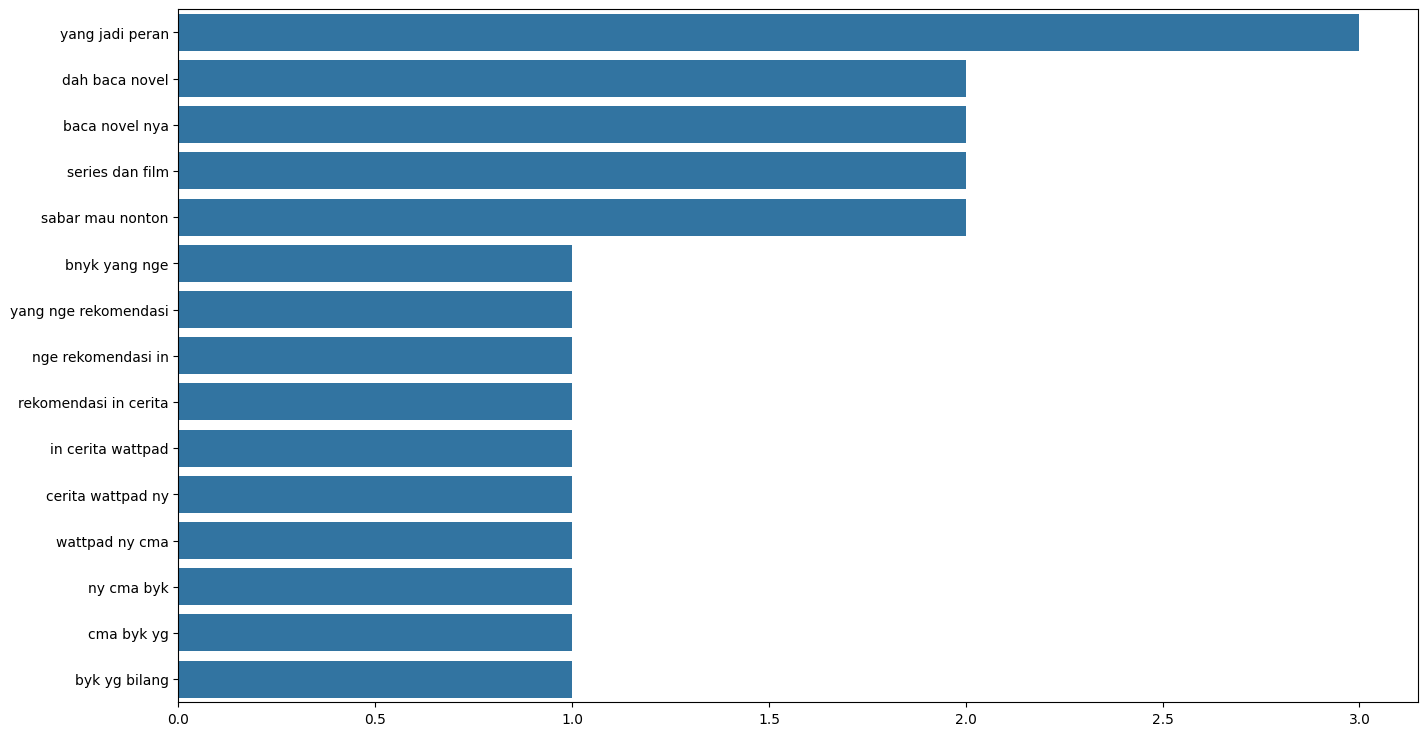

In [ ]:
plt.figure(figsize=(16,9))
most_common_bi = plot_gram(df.comment_text,3,15)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<Axes: >

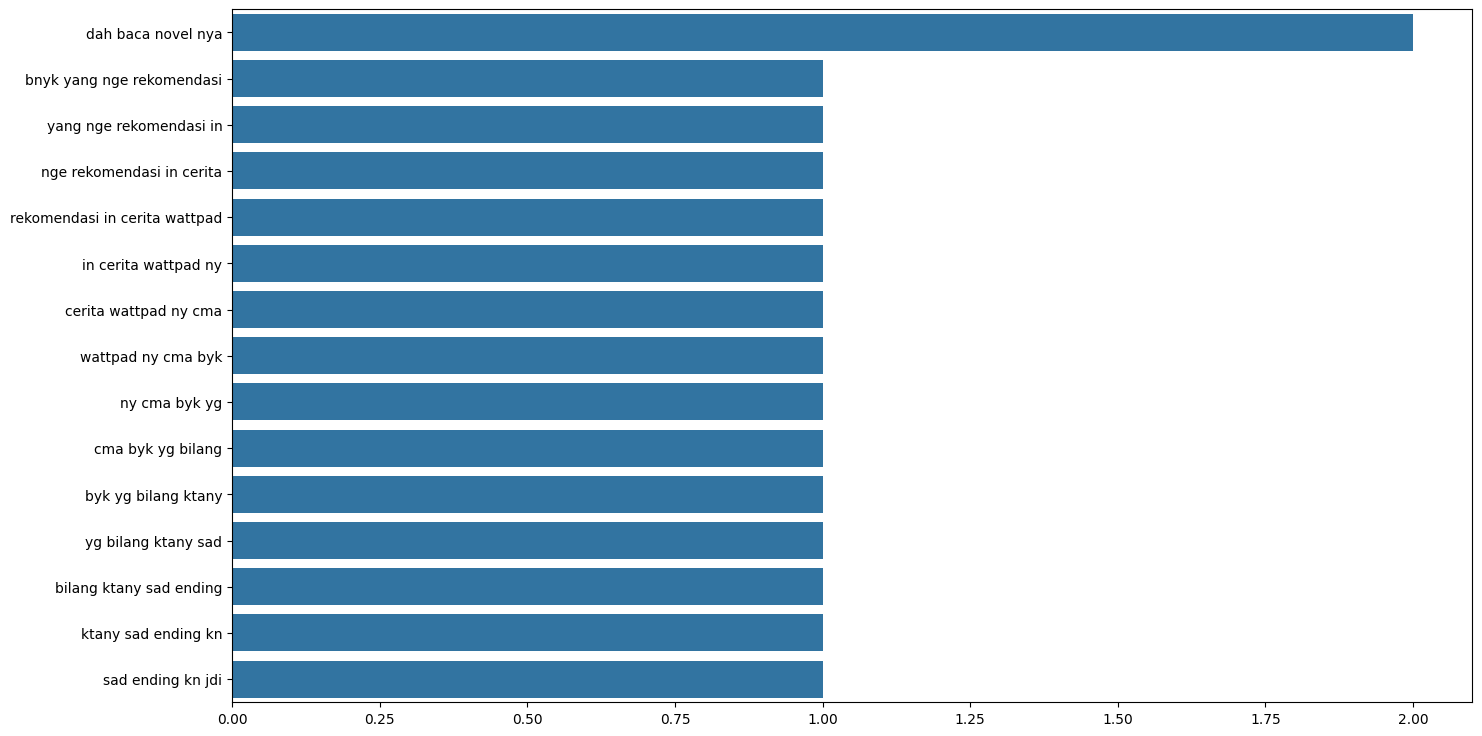

In [ ]:
plt.figure(figsize=(16,9))
most_common_bi = plot_gram(df.comment_text,4,15)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

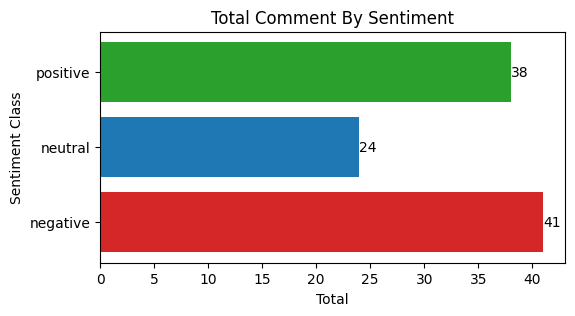

In [ ]:
import matplotlib.pyplot as plt
colors = {'positive': 'tab:green', 'negative': 'tab:red', 'neutral': 'tab:blue'}
sentiment_counts = df['sentiment'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
for sentiment_class, count in sentiment_counts.items():
    plt.barh(sentiment_class, count, color=colors[sentiment_class])
    plt.text(count, sentiment_class, str(count), va='center')
plt.title("Total Comment By Sentiment")
plt.xlabel('Total')
plt.ylabel('Sentiment Class')
plt.show()

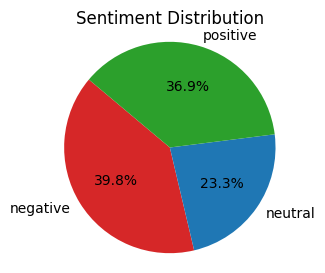

In [ ]:
# Plotting
plt.figure(figsize=(3, 3))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        colors=[colors[x] for x in sentiment_counts.index],
        autopct='%1.1f%%',
        startangle=140)
plt.title("Sentiment Distribution")
plt.axis('equal')
plt.show()